In [7]:
print("Average Budgeted Amount:", df["Budgeted Amount"].mean())


Average Budgeted Amount: 12551.02


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("Budget_Spending_Data_Modified5.csv")

# Convert month name (like 'Jan') to number (1)
if df["Month"].dtype == 'object':
    df["Month"] = pd.to_datetime(df["Month"], format='%b').dt.month

# Features and target
X = df[["Month", "Year", "Actual Spending"]]
y = df["Budgeted Amount"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and hyperparameter grid
model = RandomForestRegressor(random_state=42)
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [ 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("MAE after tuning:", mae)
print("R² Score after tuning:", r2)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
MAE after tuning: 1267.345517249709
R² Score after tuning: 0.8415940116372153


✅ Final Model Evaluation
MAE: 1268.28
R² Score: 0.84


C:\Users\Shanmathy\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


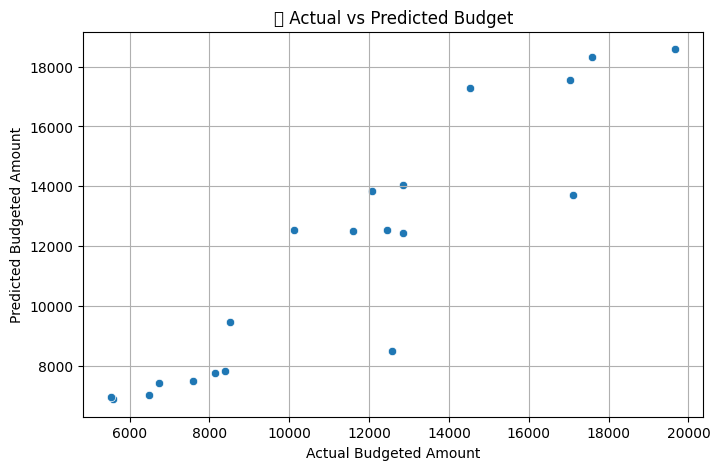

💡 Suggested Budget for March 2025: ₹9437.68


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Budget_Spending_Data_Modified5.csv")

# Convert Month from abbreviated name to numeric (e.g., 'Jan' -> 1)
if df["Month"].dtype == 'object':
    df["Month"] = pd.to_datetime(df["Month"], format='%b').dt.month

# Feature and Target Selection
X = df[["Month", "Year", "Actual Spending"]]
y = df["Budgeted Amount"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate model with best hyperparameters
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Final Model Evaluation")
print("MAE:", round(mae, 2))
print("R² Score:", round(r2, 3))

# Plot: Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Budgeted Amount")
plt.ylabel("Predicted Budgeted Amount")
plt.title("📊 Actual vs Predicted Budget")
plt.grid(True)
plt.show()

# 🔮 Predict for March 2025 with expected spending of 10,000
input_data = pd.DataFrame({
    "Month": [3],         # March
    "Year": [2025],
    "Actual Spending": [10000]
})

predicted_budget = model.predict(input_data)
print(f"💡 Suggested Budget for March 2025: ₹{predicted_budget[0]:.2f}")
